<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Naive-Forecast" data-toc-modified-id="Naive-Forecast-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Naive Forecast</a></span></li><li><span><a href="#Average-Forecast" data-toc-modified-id="Average-Forecast-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Average Forecast</a></span></li><li><span><a href="#Rolling-Aveage-Forecast" data-toc-modified-id="Rolling-Aveage-Forecast-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rolling Aveage Forecast</a></span></li><li><span><a href="#Simple-Exponential-Smoothing" data-toc-modified-id="Simple-Exponential-Smoothing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simple Exponential Smoothing</a></span></li><li><span><a href="#Holt's-Linear-Trend-Method" data-toc-modified-id="Holt's-Linear-Trend-Method-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Holt's Linear Trend Method</a></span></li><li><span><a href="#Holt-Winters-Method" data-toc-modified-id="Holt-Winters-Method-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Holt-Winters Method</a></span></li><li><span><a href="#ARIMA(p,d,q)-Model" data-toc-modified-id="ARIMA(p,d,q)-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ARIMA(p,d,q) Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#SARIMAX-model" data-toc-modified-id="SARIMAX-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>SARIMAX model</a></span></li></ul></div>

In [1]:
import pandas as pd, numpy as np
import pandas_datareader.data as web
from datetime import datetime
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
p = print

In [2]:
# import pandas_datareader.data as web
# ticker = 'AAPL'
# df = web.DataReader(ticker,'yahoo','01/01/2010','12/31/2018')

In [3]:
# df.to_csv('AAPL.csv')

In [4]:
df = pd.read_csv('AAPL.csv')

In [5]:
# # Load data on Kaggle
# df = pd.read_csv('../input/aapl.csv') #, index_col='Date', parse_dates=True)

In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140


In [7]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2259,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540
2260,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475
2261,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562
2262,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389
2263,2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,155.405045


In [8]:
df.index = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [9]:
# forecast last two months
train = df.Close[0:-251]
train.index = df.index[0:-251]
test = df.Close[-251:]
test.index = df.index[-251:]

In [10]:
# df = df.resample('W').mean()
# df.index = df.index
# train = train.resample('W').mean()
# train.index = train.index
# test = test.resample('W').mean()
# test.index = test.index

In [11]:
# plt.figure(figsize=(16,10))
# train.plot(label='Train')
# test.plot(label='Test')
# plt.legend();

## Naive Forecast

In [12]:
yhat_naive = test.copy()

In [13]:
naive_pred = train.copy().values[-1]

In [14]:
yhat_naive = pd.Series(data=naive_pred, index=test.index)

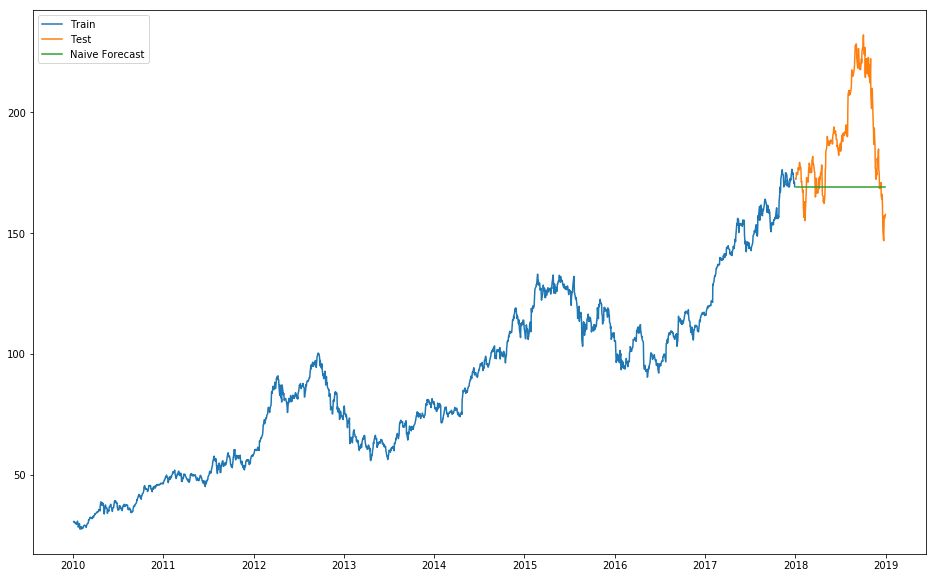

In [15]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_naive.index, yhat_naive, label='Naive Forecast')
plt.legend();

In [16]:
def root_mean_square_error(y, yhat):
    rmse = np.sqrt(np.mean(np.square(y - yhat)))
    return rmse

In [17]:
naive_rmse = root_mean_square_error(test, yhat_naive)
p('Naive RMSE:', naive_rmse)

Naive RMSE: 28.55496176056308


## Average Forecast

In [18]:
yhat_avg = test.copy()
yhat_avg.head()

Date
2018-01-02    172.259995
2018-01-03    172.229996
2018-01-04    173.029999
2018-01-05    175.000000
2018-01-08    174.350006
Name: Close, dtype: float64

In [19]:
avg_pred = np.mean(train)
yhat_avg = pd.Series(data=avg_pred, index=test.index)

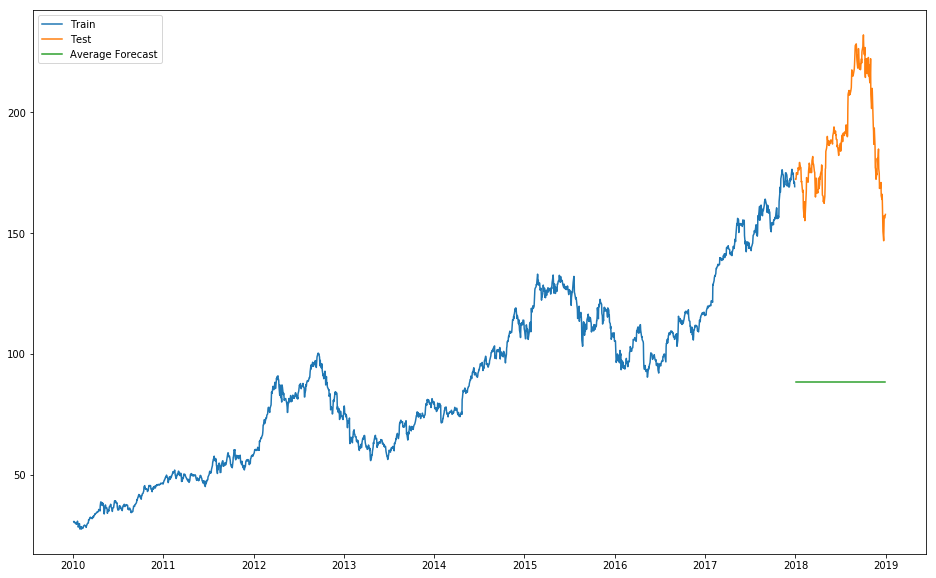

In [20]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_avg.index, yhat_avg, label='Average Forecast')
plt.legend();

In [21]:
avg_rmse = root_mean_square_error(test, yhat_avg)
p('Average RMSE:',avg_rmse)

Average RMSE: 102.85369098913247


> ## Rolling Aveage Forecast

In [22]:
yhat_ra = test.copy()

In [23]:
ra_pred = train.rolling(window=40).mean().iloc[-1]
yhat_ra = pd.Series(data=ra_pred, index=test.index)

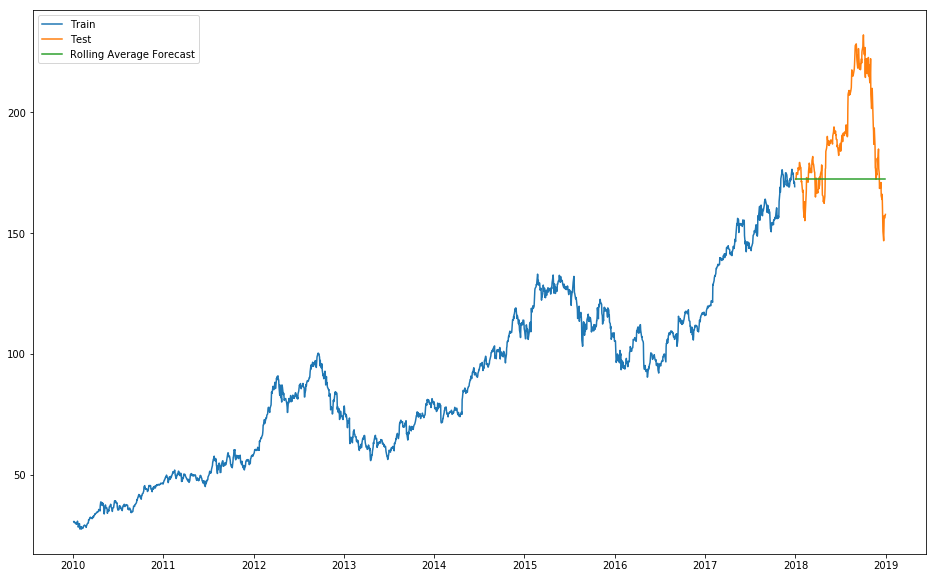

In [24]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_ra.index, yhat_ra, label='Rolling Average Forecast')
plt.legend();

In [25]:
ra_rmse = root_mean_square_error(test, yhat_ra)
p('Rolling Average RMSE:', ra_rmse)

Rolling Average RMSE: 26.5243069426697


## Simple Exponential Smoothing

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [27]:
yhat_ses = test.copy()

In [28]:
ses = SimpleExpSmoothing(train.values)

In [29]:
ses_fit = ses.fit(smoothing_level=0.6, optimized=False)

In [30]:
ses_pred = ses_fit.forecast(len(test))

In [31]:
yhat_ses = pd.Series(data=ses_pred, index=test.index)

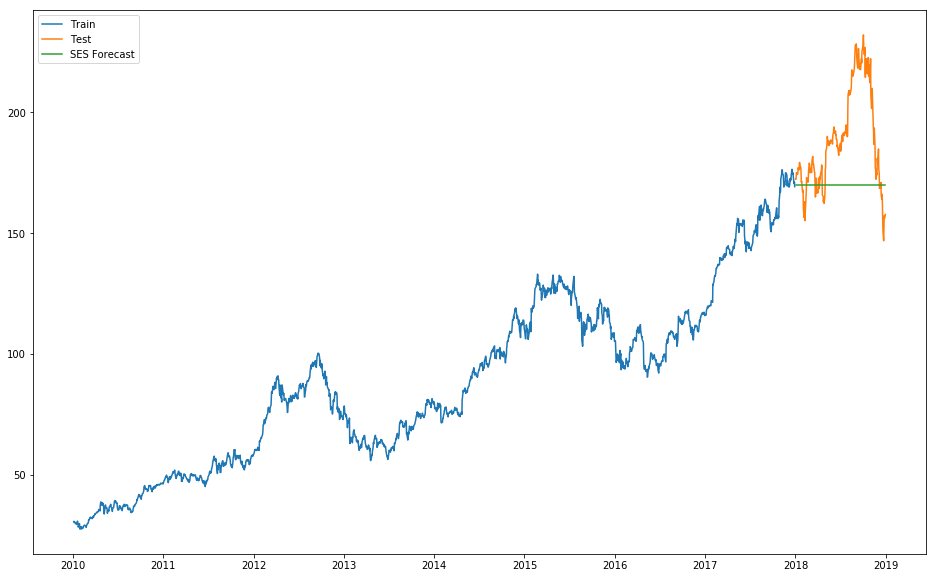

In [32]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_ses.index, yhat_ses, label='SES Forecast')
plt.legend();

In [33]:
ses_rmse = root_mean_square_error(test, yhat_ses)
p('Simple Exponential Smoothing RMSE:',ses_rmse)

Simple Exponential Smoothing RMSE: 28.02388624691178


## Holt's Linear Trend Method

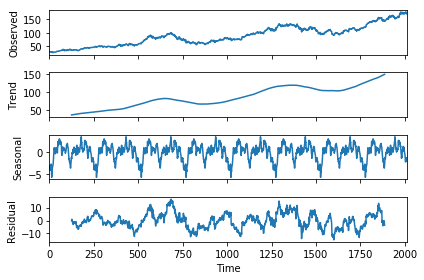

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose daily observations according to a 'trading' year
seasonal_decompose(train.values, freq=252).plot();

In [35]:
yhat_holt = test.copy()

In [36]:
holt = Holt(train.values)

In [37]:
holt_fit = holt.fit(smoothing_level=0.6, smoothing_slope=0.03)

In [38]:
holt_pred = holt_fit.forecast(len(test))

In [39]:
yhat_holt = pd.Series(data=holt_pred, index=test.index)

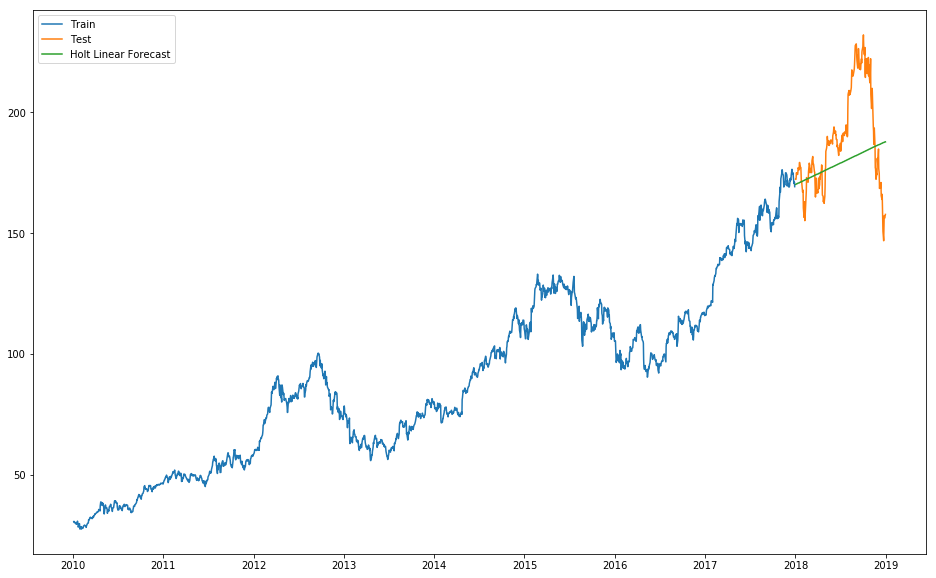

In [40]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_holt.index, yhat_holt, label='Holt Linear Forecast')
plt.legend();

In [41]:
holt_rmse = root_mean_square_error(test, yhat_holt)
p('Holt Linear RMSE:', holt_rmse)

Holt Linear RMSE: 21.25260664704108


## Holt-Winters Method

In [42]:
yhat_hw = test.copy()

In [43]:
hw = ExponentialSmoothing(train.values,
                          seasonal_periods=252,
                          trend='add',
                          seasonal='add')

In [44]:
hw_fit = hw.fit()

C:\Users\Robert Brown\Anaconda3\envs\test_env\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [45]:
hw_pred = hw_fit.forecast(len(test))

In [46]:
yhat_hw = pd.Series(data=hw_pred, index=test.index)

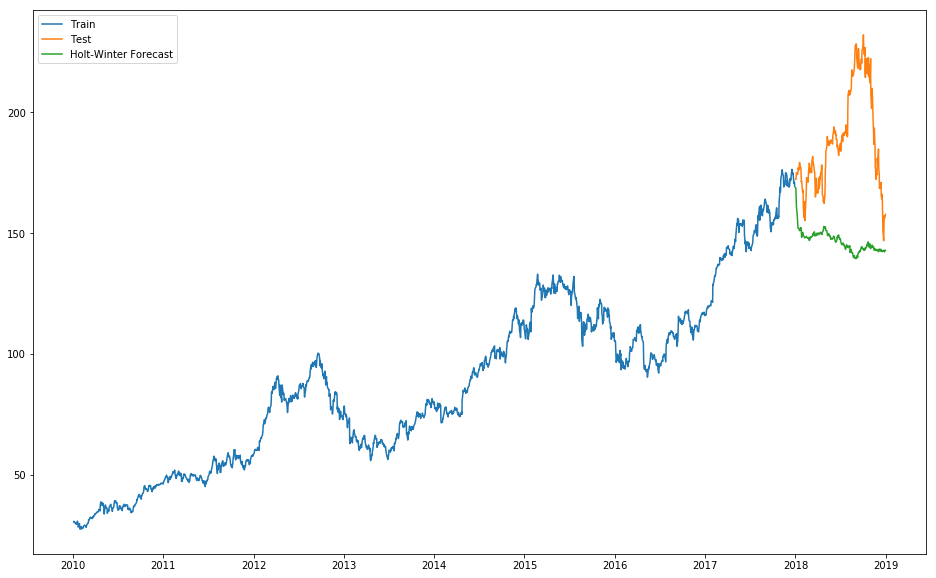

In [47]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_hw.index, yhat_hw, label='Holt-Winter Forecast')
plt.legend();

In [48]:
hw_rmse = root_mean_square_error(test, yhat_hw)
p('Holt-Winter RMSE:', hw_rmse)

Holt-Winter RMSE: 48.26357356534782


## ARIMA(p,d,q) Model

In [49]:
df = pd.read_csv('AAPL.csv')

In [50]:
df.index = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [51]:
# We have seasonal data!(P,D,Q,S)
arima = sm.tsa.statespace.SARIMAX(df.Close.values, 
                                  order=(0,1,0), 
                                  seasonal_order=(0,1,0,12))

In [52]:
arima_fit = arima.fit()

In [53]:
train.index[0]

Timestamp('2010-01-04 00:00:00')

In [54]:
train.index[-1]

Timestamp('2017-12-29 00:00:00')

In [55]:
n =len(df.Close)
n

2264

In [56]:
arima_pred = arima_fit.predict(start = n - 250,
                                  end = n,
                                  dynamic = True)

In [57]:
yhat_arima = pd.Series(data=arima_pred, index=test.index)

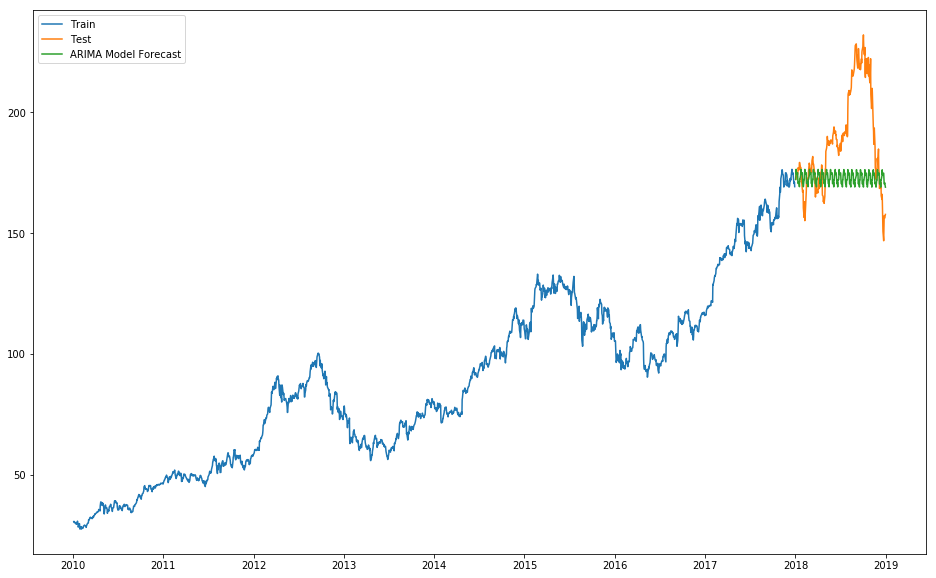

In [58]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(yhat_arima.index, yhat_arima, label='ARIMA Model Forecast')
plt.legend();

In [59]:
arima_rmse = root_mean_square_error(test, yhat_arima)
p('ARIMA Model RMSE:', arima_rmse)

ARIMA Model RMSE: 26.27287572457261


## Conclusion

In [60]:
p('Forecast Accuracy:')
p('_________________')
p('Naive:',naive_rmse)
p('Average:',avg_rmse)
p('Rolling average:',ra_rmse)
p('Simple Exponential Smoothing:',ses_rmse)
p('Holt Linear:',holt_rmse)
p('Holt-Winter:',hw_rmse)
p('ARIMA:',arima_rmse)

Forecast Accuracy:
_________________
Naive: 28.55496176056308
Average: 102.85369098913247
Rolling average: 26.5243069426697
Simple Exponential Smoothing: 28.02388624691178
Holt Linear: 21.25260664704108
Holt-Winter: 48.26357356534782
ARIMA: 26.27287572457261


In [61]:
data = [naive_rmse, 
        avg_rmse, 
        ra_rmse, 
        ses_rmse, 
        holt_rmse, 
        hw_rmse, 
        arima_rmse]

In [62]:
index = ['Naive', 
         'Average', 
         'Rolling Average', 
         'Simple Exponential Smoothing', 
         'Holt Linear', 
         'Holt-Winter', 
         'ARIMA']

In [63]:
df_accu = pd.DataFrame(data=data, index=index)
p('Forecast Accuracy:',df_accu)

Forecast Accuracy:                                        0
Naive                          28.554962
Average                       102.853691
Rolling Average                26.524307
Simple Exponential Smoothing   28.023886
Holt Linear                    21.252607
Holt-Winter                    48.263574
ARIMA                          26.272876
